In [2]:
import tensorflow as tf 
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
#loadind test and train dataset of handwritten digits from keras 
(x_train,y_train),(x_test,y_test)= keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [10]:
print(len(x_train))
print(len(x_test))

60000
10000


In [13]:
#each image is a 28x28 matrix of pixels ranging between 0 to 255
x_train[0].shape

(28, 28)

In [ ]:
#representing image in 2 D array , here 0 is black and 255 is white colour in the image
x_train[0]

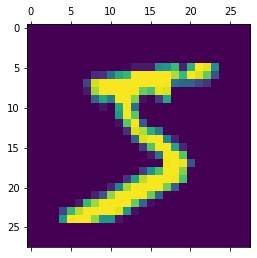

In [15]:
#visualizing 2D array into image using matplotlib 
plt.matshow(x_train[0])

In [27]:
#scaling the values 
x_train=x_train/255
x_test=x_test/255

In [33]:
#flattening the 2d array(matrix) into single dimension
x_train_flattened=(x_train.reshape(len(x_train),28*28))
x_test_flattened=(x_test.reshape(len(x_test),28*28))
x_train_flattened.shape

(60000, 784)

In [32]:
#creating a basic neural network (single layer)
model = keras.Sequential([
        keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])
#compiling the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

#fitting model to training data
model.fit(x_train_flattened,y_train,epochs=10)


Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4737 - accuracy: 0.8762
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3042 - accuracy: 0.9153
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2838 - accuracy: 0.9209
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2731 - accuracy: 0.9236
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2667 - accuracy: 0.9257
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2622 - accuracy: 0.9274
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2585 - accuracy: 0.9283
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2552 - accuracy: 0.9300
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2526 - accuracy: 0.9302
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.251

In [34]:
#evaluating the accurecy of the model on test data
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2676 - accuracy: 0.9253


[0.26758697628974915, 0.9253000020980835]

In [35]:
#predicting the values of test data
y_pred = model.predict(x_test_flattened)
y_pred[0]

array([5.39106131e-03, 1.02672155e-08, 9.48876143e-03, 9.71345782e-01,
       1.06266141e-03, 1.13758087e-01, 3.67327750e-08, 9.99851346e-01,
       4.61558104e-02, 6.38061643e-01], dtype=float32)

In [38]:
#using argmax to find the predicted value
np.argmax(y_pred[0])
y_pred_lebels=[np.argmax(i) for i in y_pred]
y_pred_lebels[:5]

[7, 2, 1, 0, 4]

In [43]:
#buiulding confusion matrix
cm =tf.math.confusion_matrix(labels=y_test,predictions=y_pred_lebels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 963,    0,    1,    2,    0,    5,    6,    2,    1,    0],
       [   0, 1112,    3,    2,    0,    1,    4,    2,   11,    0],
       [   6,    8,  928,   19,    5,    3,   13,   11,   34,    5],
       [   2,    0,   15,  941,    0,   22,    2,   10,   11,    7],
       [   1,    1,    5,    2,  898,    0,   15,    5,    9,   46],
       [   8,    2,    1,   36,    7,  785,   14,    7,   26,    6],
       [  13,    3,    4,    2,    7,   12,  915,    1,    1,    0],
       [   1,    6,   20,   10,    3,    1,    0,  954,    2,   31],
       [  10,    9,    6,   35,    8,   36,   12,   13,  834,   11],
       [  11,    7,    1,   14,   17,    6,    0,   27,    3,  923]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

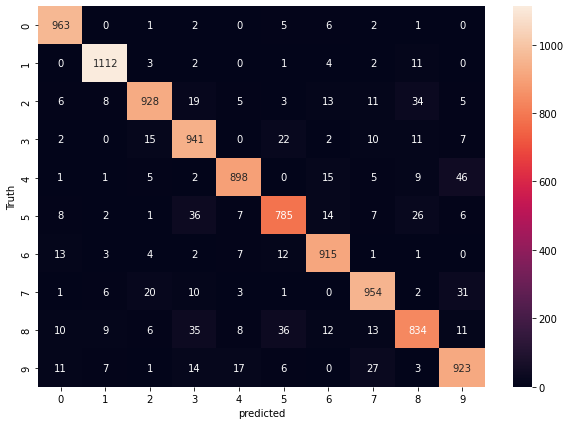

In [45]:
#using seaborn to visualize the confusion matrix
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('Truth')

In [48]:
#adding a hidden layer to the single layer neural network
model = keras.Sequential([
        keras.layers.Dense(100,input_shape=(784,),activation='tanh'),
        keras.layers.Dense(10,activation='sigmoid')
])
#compiling the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

#fitting model to training data
model.fit(x_train_flattened,y_train,epochs=10)


Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2943 - accuracy: 0.9156
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1448 - accuracy: 0.9582
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0996 - accuracy: 0.9706
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0766 - accuracy: 0.9782
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0584 - accuracy: 0.9834
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0471 - accuracy: 0.9866
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0378 - accuracy: 0.9895
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0301 - accuracy: 0.9920
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0245 - accuracy: 0.9937
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.020

In [52]:
#creating a neural network without the flatten array 
#using keras.Flatten as a layer to flatten the data 
model = keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28,28)),                
        keras.layers.Dense(100,activation='tanh'),
        keras.layers.Dense(10,activation='sigmoid')
])
#compiling the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

#fitting model to training data
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2907 - accuracy: 0.9167
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1432 - accuracy: 0.9582
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0995 - accuracy: 0.9717
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0750 - accuracy: 0.9782
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0578 - accuracy: 0.9832
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0456 - accuracy: 0.9870
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0364 - accuracy: 0.9902
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0293 - accuracy: 0.9919
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0240 - accuracy: 0.9937
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.019

In [53]:
#evaluating the model 
model.evaluate(x_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0808 - accuracy: 0.9764


[0.0808078870177269, 0.9764000177383423]